In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('../data/processed/cleaned_house_data.csv')

In [3]:
df.head()

,price,sqft,bedrooms,bathrooms,location,year_built,condition
0,495000,1527,2,1.5,Suburb,1956,Good
1,752000,2526,3,2.5,Downtown,1998,Excellent
2,319000,1622,2,1.5,Rural,1975,Fair
3,1210000,3102,4,3.0,Waterfront,2005,Excellent
4,462000,1835,2,2.0,Urban,1982,Good


In [4]:
df.shape

(77, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       77 non-null     int64  
 1   sqft        77 non-null     int64  
 2   bedrooms    77 non-null     int64  
 3   bathrooms   77 non-null     float64
 4   location    77 non-null     object 
 5   year_built  77 non-null     int64  
 6   condition   77 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 4.3+ KB


In [6]:
df.describe()

,price,sqft,bedrooms,bathrooms,year_built
count,7.700000e+01,77.000000,77.000000,77.000000,77.000000
mean,5.532338e+05,2068.000000,2.701299,2.025974,1979.025974
std,2.651523e+05,522.756711,0.689488,0.643265,17.427273
min,2.490000e+05,1350.000000,2.000000,1.000000,1947.000000
25%,3.680000e+05,1680.000000,2.000000,1.500000,1965.000000
50%,4.950000e+05,1950.000000,3.000000,2.000000,1981.000000
75%,6.200000e+05,2280.000000,3.000000,2.500000,1992.000000
max,1.250000e+06,3250.000000,4.000000,3.500000,2010.000000


In [7]:
df['house_age']=datetime.now().year-df['year_built']
df['price_per_sqft']=df['price']/df['sqft']
df['bed_bath_ratio']=df['bedrooms']/df['bathrooms']
df['bed_bath_ratio']=df['bed_bath_ratio'].replace(
    to_replace=[-np.inf,np.inf],value=np.nan).fillna(0)

In [8]:
df[['house_age','price_per_sqft','bed_bath_ratio']].describe()

,house_age,price_per_sqft,bed_bath_ratio
count,77.000000,77.000000,77.000000
mean,45.974026,255.220441,1.382437
std,17.427273,54.499780,0.263195
min,15.000000,179.761905,1.000000
25%,33.000000,226.829268,1.200000
50%,44.000000,251.904762,1.333333
75%,60.000000,275.193798,1.500000
max,78.000000,390.070922,2.000000


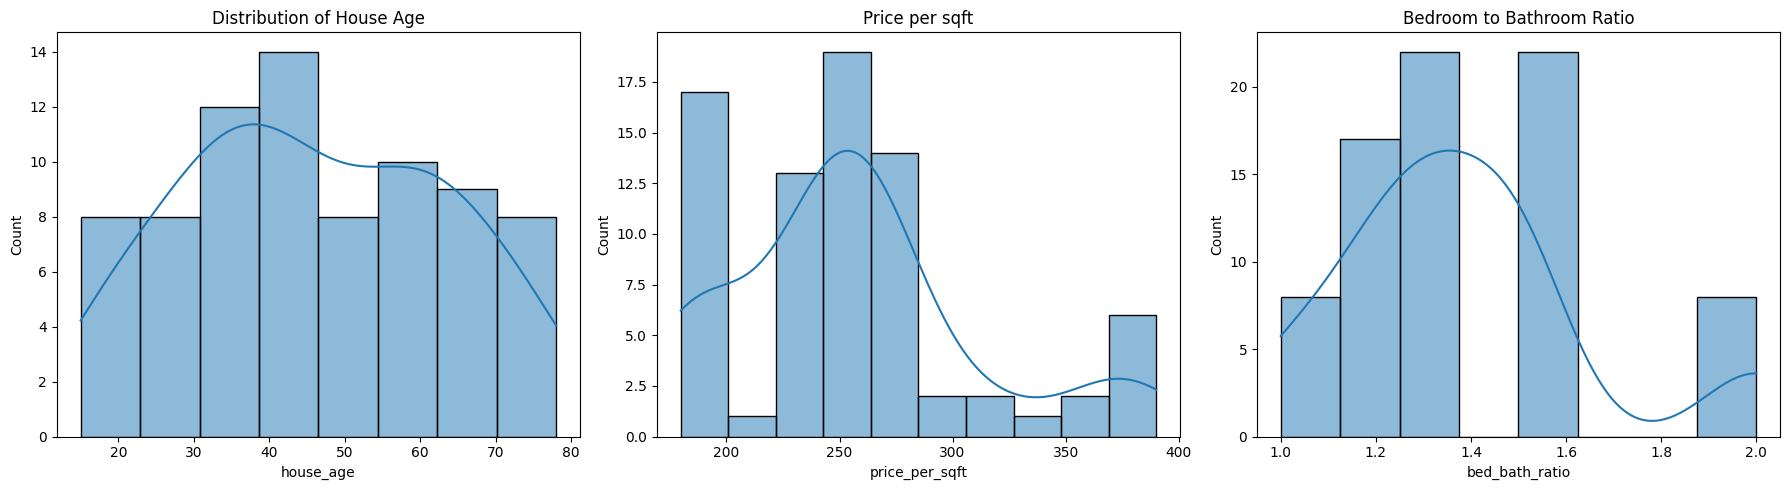

In [16]:
fig, axis=plt.subplots(nrows=1,ncols=3, figsize=(18,5))

sns.histplot(data=df,x='house_age',kde=True,ax=axis[0])
axis[0].set_title('Distribution of House Age')

sns.histplot(data=df,x='price_per_sqft',kde=True,ax=axis[1])
axis[1].set_title('Price per sqft')

sns.histplot(data=df,x='bed_bath_ratio',kde=True,ax=axis[2])
axis[2].set_title('Bedroom to Bathroom Ratio')
plt.tight_layout()
plt.show()

In [17]:
df.columns

Index(['price', 'sqft', 'bedrooms', 'bathrooms', 'location', 'year_built',
       'condition', 'house_age', 'price_per_sqft', 'bed_bath_ratio'],
      dtype='object')

In [18]:
selected_columns=['price', 'sqft', 'bedrooms', 'bathrooms', 'location', 'year_built',
       'condition', 'house_age', 'price_per_sqft', 'bed_bath_ratio']

In [19]:
df[selected_columns].to_csv('../data/processed/data_scientists_features.csv',index=False)